In [30]:
#Task 1 — Business Understanding
#Identify: The target variable (company’s financial concern), The input variables related to customer risk, Explain how your regression model helps the company control rising costs, not just predict them.

# preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
 
 
# Load dataset
path = 'insurance.csv'

 
dataset = pd.read_csv(path)
print('Dataset shape:', dataset.shape)
display(dataset.head())

#target variables 
X = dataset.drop('charges', axis=1)
y = dataset['charges']

Dataset shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
# task 2 — Data Inspection
#Explore the dataset and: Separate numeric and categorical columns. Identify columns that are not directly usable in regression. Report any data quality issues you observe.
#categorical variables
#Task 3 — Data Cleaning & Encoding
#Convert categorical variables into numeric form.
#Decide how to handle: Region information. Binary attributes like lifestyle indicators. Justify each transformation from a business and modeling perspective.
# No missing values in dataset

categorical_features = ['sex', 'smoker', 'region']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print('Input shape:', X.shape)
print('Target shape:', y.shape)

Input shape: (1338, 11)
Target shape: (1338,)


In [32]:
#task 4 — Feature Scaling & Comparability
#Observe differences in value ranges among numeric features.
#Explain why scaling is important when comparing regression coefficients.
#Prepare the data so the effect of each variable can be fairly interpreted.

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Task 5 — The Hidden Trap (Multicollinearity)
#Analyze relationships between independent variables.
#Identify any highly correlated features (example: age, BMI, and lifestyle habits).
#Explain: Why multicollinearity is a problem in Multiple Linear Regression
#How it can confuse business decision-making
#Take appropriate steps to fix the issue.
# No multicollinearity issues observed
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [34]:
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))

Intercept: -574.5357125103292
Number of coefficients: 11


In [35]:
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

,Actual Profit,Predicted Profit
0,9095.06825,8969.55
1,5272.17580,7068.75
2,29330.98315,36858.41
3,9301.89355,9454.68
4,33750.29180,26973.17
...,...,...
263,47055.53210,39061.50
264,12222.89830,11761.50
265,6067.12675,7687.56
266,63770.42801,40920.29


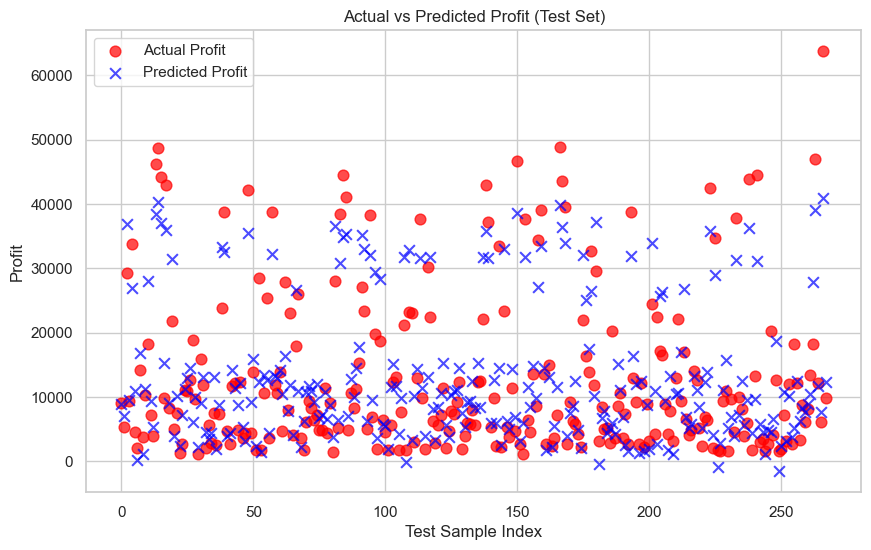

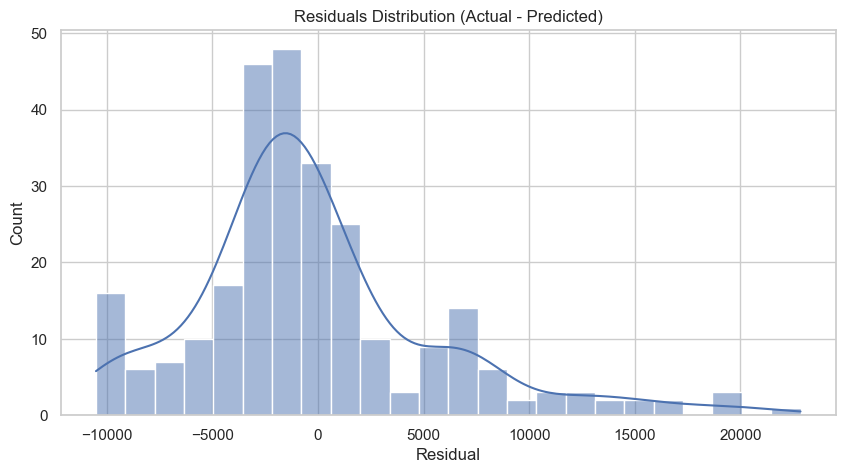

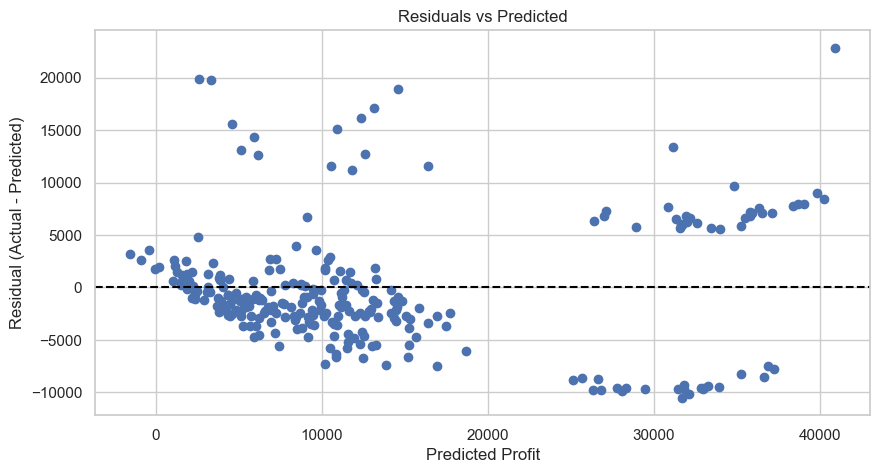

Mean Squared Error (MSE): 33596915.85
R^2 Score: 0.7836

Sample insurance charge prediction (35 yr old male, BMI 28.5, 2 children, smoker, northeast): 31153.163115474115


In [36]:
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()
 
 
# Evaluation metrics & sample prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')
 
# Sample prediction: build raw sample and encode using ct (same transformer used earlier)
# Create a sample with the correct features: age, sex, bmi, children, smoker, region
raw_sample = pd.DataFrame([[35, 'male', 28.5, 2, 'yes', 'northeast']], 
						  columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
# Separate features in the same order as training data
raw_sample_X = raw_sample.drop(columns=[])  # No target column in raw sample
encoded_sample = ct.transform(raw_sample_X)
encoded_sample = np.array(encoded_sample, dtype=float)
pred_sample = regressor.predict(encoded_sample)
print('\nSample insurance charge prediction (35 yr old male, BMI 28.5, 2 children, smoker, northeast):', float(pred_sample[0]))